In [527]:
import numpy as np
import matplotlib.pyplot as plt


*Teorema*: A aproximação ótima de posto $r$ de uma matriz $A \in \mathbb{R}$, no sentido de _minimos quadrados_ é dada pelo truncamento da decomposição SVD:

$$
\argmin_{\tilde{X},\ \text{s.a: rank}(\tilde{X})=r} \|X - \tilde{X}\|_{F} = \tilde{U}\tilde{\Sigma}\tilde{V}^*
$$

onde $\tilde{U}$ e $\tilde{V}$ representam as primeiras $r$ colunas de $U$ e $V$ e $\tilde{\Sigma}$ representa o bloco $r \times r$ da matriz $\Sigma$

uint8
float64


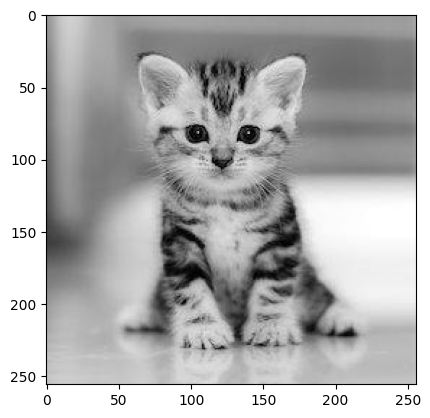

In [528]:
img = plt.imread('kitten.jpg')
print(img.dtype)
img = np.float64(img)
print(img.dtype)
plt.imshow(img, cmap='gray')

(256, 256)
(256,)
(256, 256)


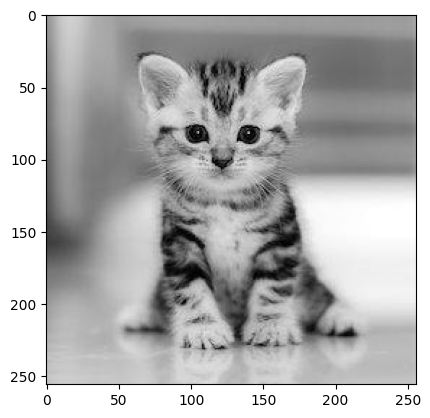

In [529]:
# APLICAR SVD


U, S, Vt = np.linalg.svd(img, full_matrices = True) # a matriz sigma tem todos os valores e o zero ao final

print (U.shape)
print (S.shape) # não é uma matriz, só tem valores singulares + resto zero
print (Vt.shape)

A_reconstr = U @ np.diag(S) @ Vt

plt.imshow(A_reconstr, cmap="grey") # ou seja, é igual a imagem



Tamanho original: 65536

Tamanho r: 5130


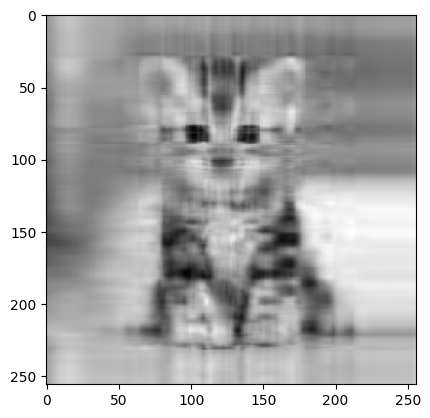

In [530]:
## SELECIONAR O POSTO DA MATRIX E COMPARAR COM O ORIGINAL

r = 10

Ur = U[:, :r]
Sr = S[:r]
Vtr = Vt[:r, :]

Ar = Ur @ np.diag(Sr) @ Vtr

# a primeira imagem foi formada por 256 x 256 pixeis
tam_orig = 256 * 256


plt.imshow(Ar, cmap="grey")

# essa imagem foi formada por:
tam_r = 256 * r + r + 256*r

print (f"\nTamanho original: {tam_orig}")
print (f"\nTamanho r: {tam_r}")
# se aumentarmos o r, a imagem é mais nítida

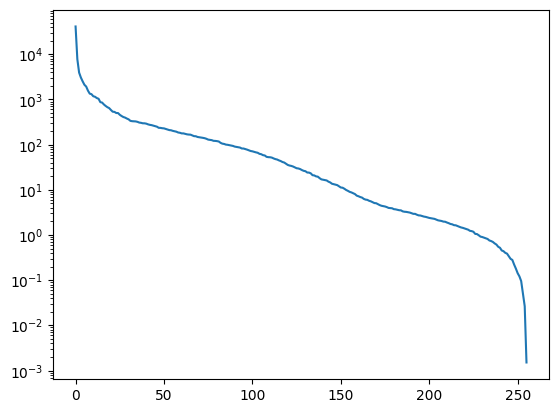

In [531]:
## MOSTRAR VALORES SINGULARES

plt.plot(S)

plt.yscale('log')

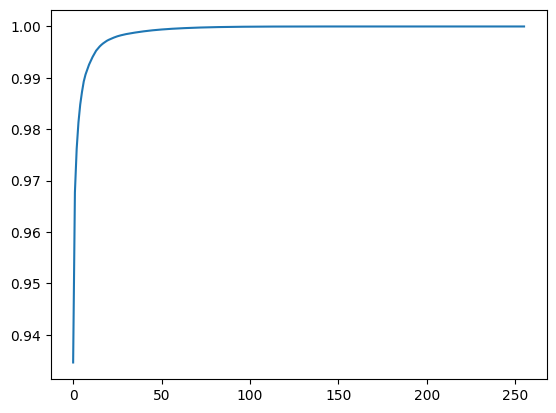

In [532]:
## ACUMULO DE ENERGIA

S2 = S**2
            # [a1, a1+a2, a1+a2+a3,...,] 
            # soma acumulativa
energia = np.cumsum(S2)                     / S2.sum()

plt.plot(energia)

# entendendo o gráfico -> para 50, a imagem fica nitida
# para 50 valores singulares, a imagem fica ótima (perde poucos detalhes)


## Quantificação do erro

$$
\|X - \tilde{X}\|^2_F = \sum_{i=r+1}^{n} \sigma_i^2
$$

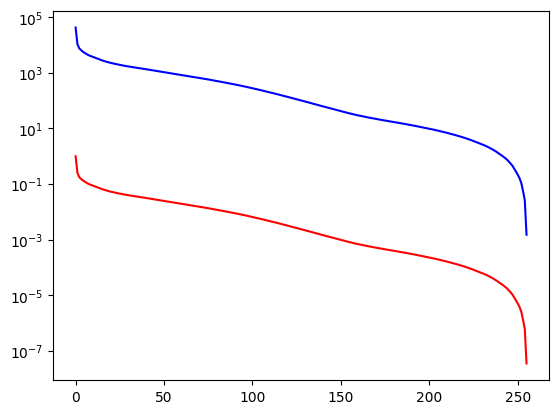

In [533]:
# ERRO DA APROXIMAÇÃO
# soma dos valores singulares não utilizados (usamos de 0 a r, não usamos de r + 1 até n)



# pega os elementos na ordem inversa e dps desinverte
err = np.cumsum(S2[::-1])[::-1]
err = np.sqrt(err)

# erro relativo - erro em relação a imagem original
erro_relativo = err / np.linalg.norm(img)

plt.plot(err, color="blue")
plt.plot(erro_relativo, color="red")
plt.yscale('log')

In [534]:
# ERRO ATRAVÉS DOS VALORES SINGULARES

erro_real = np.linalg.norm(img - Ar)

print (erro_real)

# ou seja, o cálculo do erro é mais eficiente pela fórmula
print (err[r])


# ou seja, o SVD pode decompor uma imagem pensando em:
# - pouco custo de memória
# - pouco erro em relação a imagem original
# - por isso, tem muitas aplicações

3675.270032190636
3675.2700321906345


## Exercício: Implementação Básica do SVD 

**Objetivo:** Familiarizar-se com a função `np.linalg.svd()` e verificar as propriedades básicas da decomposição.

**Enunciado:**
Crie uma função `analisar_svd(matriz)` que:
1. Receba uma matriz A como entrada
2. Calcule a decomposição SVD: A = U × Σ × V^T
3. Imprima as dimensões de U, Σ e V^T
4. Verifique se a reconstrução A_reconstruída = U @ np.diag(s) @ Vt é igual à matriz original (use `np.allclose()`)
5. Retorne o número de valores singulares não-nulos (posto da matriz)

**Teste sua função com:**
- Uma matriz 4×3 aleatória
- Uma matriz identidade 5×5
- Uma matriz 50×50 de posto 2 (crie multiplicando duas matrizes de dimensões apropriadas)

In [535]:
def analisar_svd(matriz):

    # decompondo a matriz SVD A = U S Vt
    U, S, Vt = np.linalg.svd(matriz, full_matrices=True)
    
    # imprimindo as dimensões
    print (U.shape)
    print (S.shape)
    print (Vt.shape)

    # reconstruindo a matriz
    #   1- matriz não quadrada (if)
    #   2- matriz quadrada     (else)
    if matriz.shape[0] != matriz.shape[1]:
        
        if matriz.shape[0] > matriz.shape[1]:
            r = matriz.shape[1]
        else:
            r = matriz.shape[0]

        Ur = U[:, :r]
        Sr = S[:r]
        Vtr = Vt[:r, :]

        matriz_reconstruida = Ur @ np.diag(Sr) @ Vtr

        if np.allclose(matriz, matriz_reconstruida):
            print ("\nSão iguais!")
    
    else:
        matriz_reconstruida = U @ np.diag(S) @ Vt

        if np.allclose(matriz, matriz_reconstruida):
            print ("\nSão iguais!")

    
    # posto da matriz
    posto = 0
    for i in range (0, len(S)):
        if not np.allclose(S[i], 0):
            posto += 1

    return posto



In [536]:
# testes

matriz_4x3 = np.random.rand(4, 3) * 10

matriz_identidade = np.diag([1, 1, 1, 1, 1])

# não tenho certeza se essa matriz está correta!
matriz_50x50_pt1 = np.random.randn(50, 2)
matriz_50x50_pt2 = np.random.rand(2, 50) 
matriz_50x50 = matriz_50x50_pt1 @ matriz_50x50_pt2


posto = analisar_svd(matriz_50x50)
print (f"\nPosto: {posto}")






(50, 50)
(50,)
(50, 50)

São iguais!

Posto: 2
